## Analisis de Datos: Tendencia de Victimas a Nivel Nacional a 1 año por Secuestros

De acuerdo a los datos abiertos de la fiscalia se pueden agrupar la cantidad de victimas por año de hecho referentes al delito asociado que en nuestro caso es el secuestro y desapariciones

El objetivo de este notebook es entrenar una red neuronal para encontrar la tendencia y predecir 5 años a futuro el numero de victimas por año

### Cantidad de Victimas por Año

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import ModeloSecuestros

### Secuestros por Año y Linea de Tendencia

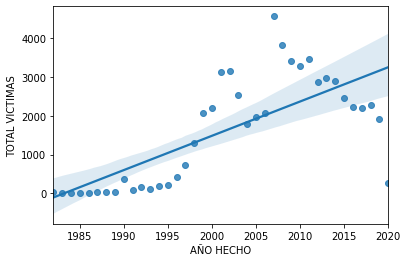

In [2]:
dfSecuestros = pd.read_csv('Datasets/victimasPorAño.csv')
dfSecuestros = dfSecuestros.rename(columns={'ANIO_HECHO':'AÑO HECHO','TOTAL_VICTIMAS':'TOTAL VICTIMAS'})
x,y = dfSecuestros['AÑO HECHO'], dfSecuestros['TOTAL VICTIMAS']
sns.regplot(x=x, y=y,)

### Modelo para predecir secuestros
### DataFrame 5 a 1 años

En este dataframe se representa lo siguiente:
- Input_0 -> Input_4 = Victimas por año en 5 años (ej: 1982 a 1986)
- Output_0 = Victimas en el año siguiente (ej: 1987)

In [21]:
datos_csv = 'Datasets/DataSetVictimasAnios5x1.csv'
df = pd.read_csv(datos_csv)
df

,Input_0,Input_1,Input_2,Input_3,Input_4,Output_0
0,24,1,1,3,11,45
1,1,1,3,11,45,46
2,1,3,11,45,46,42
3,3,11,45,46,42,358
4,11,45,46,42,358,92
5,45,46,42,358,92,171
6,46,42,358,92,171,101
7,42,358,92,171,101,187
8,358,92,171,101,187,209
9,92,171,101,187,209,430


### Construyendo el Modelo

### Modelo con Columnas Caracteristicas

In [28]:
modelo = ModeloSecuestros(csv=datos_csv, random_state = 1, inputs=['Input_{}'.format(i) for i in range(5)])
modelo.get_feature_model().summary()
modelo.get_rmse_feature()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_16 (DenseFeat multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


(1981.5019499158998, 1727.3826461806407)

#### Grafico de Dispersión

RMSE. 1953.3222268959794


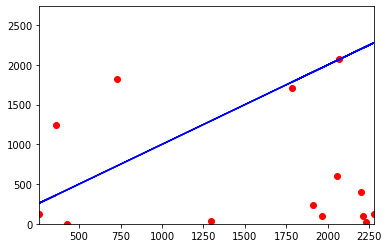

In [29]:
modelo.get_feature_scatter()

### Modelo con Capas Densas

In [12]:
modelo.get_sequential_model().summary()
modelo.get_rmse_sequential()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               1200      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 22,321
Trainable params: 22,321
Non-trainable params: 0
_________________________________________________________________


(737.2557823951734, 849.4702525259147)

#### Grafico de Dispersión

RMSE. 751.3278735200871


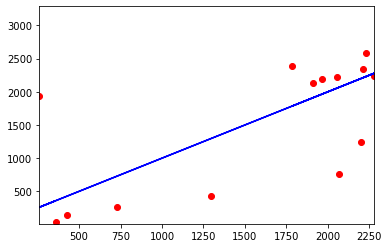

In [13]:
modelo.get_sequential_scatter()

### Maquina de Soporte Vectorial

In [16]:
modelo.get_svm_model()
modelo.get_rmse_svm()

(0.0, 2529.0635618742367)

### Gráfico de Dispersión

RMSE. 867.4616451938108


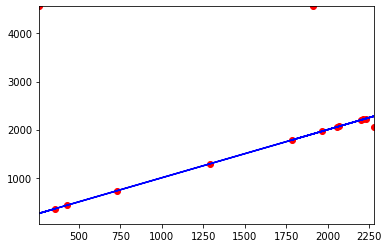

In [17]:
modelo.get_svm_scatter()

### Guardar Modelo a Disco

In [8]:
def save_feature_model():
    # serialize model to JSON
    model_json = modelo.feature_model.to_json()
    with open("feature_model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    modelo.feature_model.save_weights("feature_model.h5")
    print("Saved model to disk")

Saved model to disk
